# CIFAR10

In [6]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from diffusers import AutoencoderKL

# Device
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

# Load Test Dataset
transform_rgb = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform_rgb)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

# Load Pretrained VAE
vae = AutoencoderKL.from_pretrained("./checkpoints/vae_final").to(device)
vae.eval()

# Grayscale Transform
transform_gray = transforms.Compose([
    transforms.Grayscale(num_output_channels=3)  # Convert to grayscale
])

# Function to visualize results
def plot_results(originals, gray_imgs, reconstructions,name='train'):
    fig, axes = plt.subplots(len(originals), 3, figsize=(9, len(originals) * 3))
    
    for i in range(len(originals)):
        axes[i, 0].imshow(originals[i].permute(1, 2, 0))
        axes[i, 0].set_title("Original RGB")
        axes[i, 0].axis("off")
        
        axes[i, 1].imshow(gray_imgs[i].permute(1, 2, 0), cmap="gray")
        axes[i, 1].set_title("Gray (Grayscale)")
        axes[i, 1].axis("off")
        
        axes[i, 2].imshow(reconstructions[i].permute(1, 2, 0))
        axes[i, 2].set_title("Reconstructed RGB")
        axes[i, 2].axis("off")
    
    plt.tight_layout()
    plt.savefig(f"./imgs/{name}_results.png", dpi=300, bbox_inches="tight")
    plt.show()
    

Files already downloaded and verified


## train images

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15649857..1.0226405].


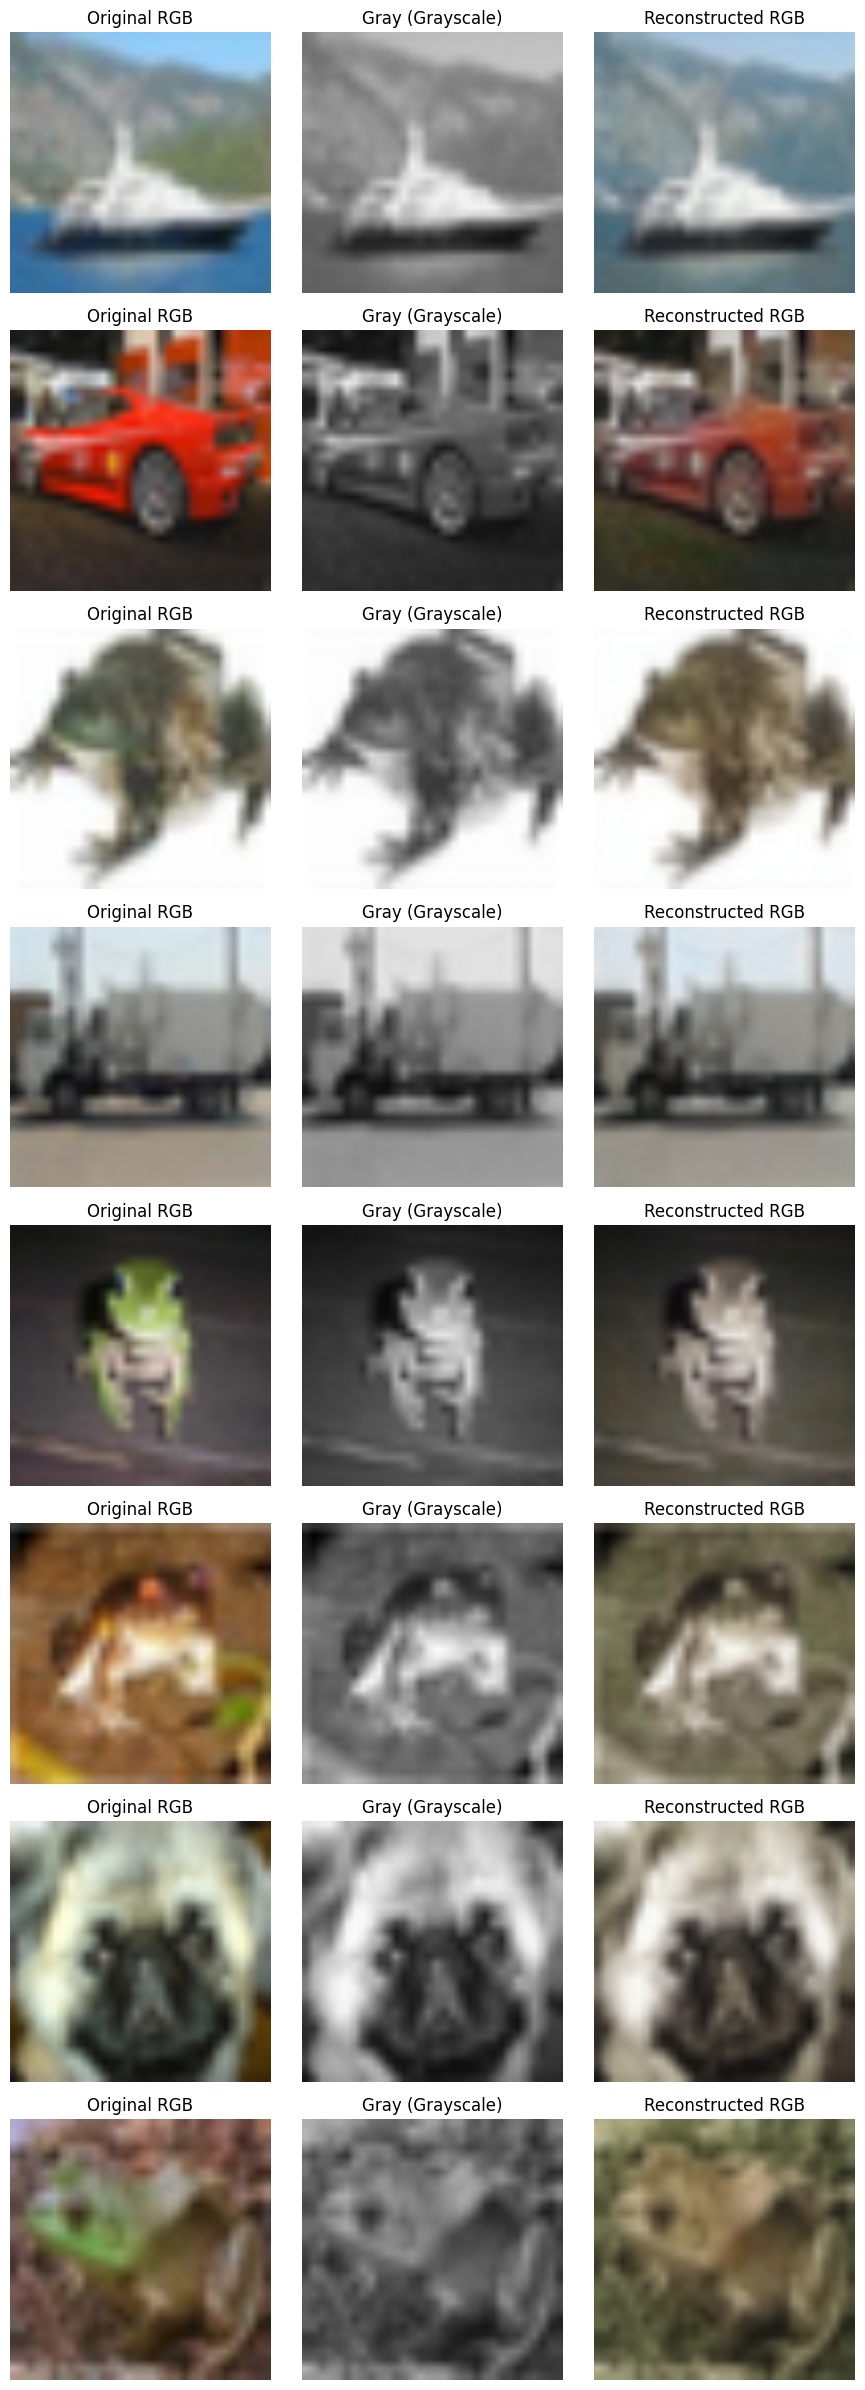

In [7]:
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_rgb)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Select a batch from the test set
with torch.no_grad():
    rgb_imgs, _ = next(iter(train_loader))
    gray_imgs = transform_gray(rgb_imgs)  # Convert RGB to grayscale
    gray_imgs, rgb_imgs = gray_imgs.to(device), rgb_imgs.to(device)
    
    # Encode Gray images
    posterior = vae.encode(gray_imgs).latent_dist
    latents = posterior.sample()
    
    # Decode to RGB
    recon_rgb = vae.decode(latents).sample.cpu()
    
    # Plot results
    plot_results(rgb_imgs.cpu(), gray_imgs.cpu(), recon_rgb, name='train')

## test images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.019998405..1.0127951].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.026474206..0.6272294].


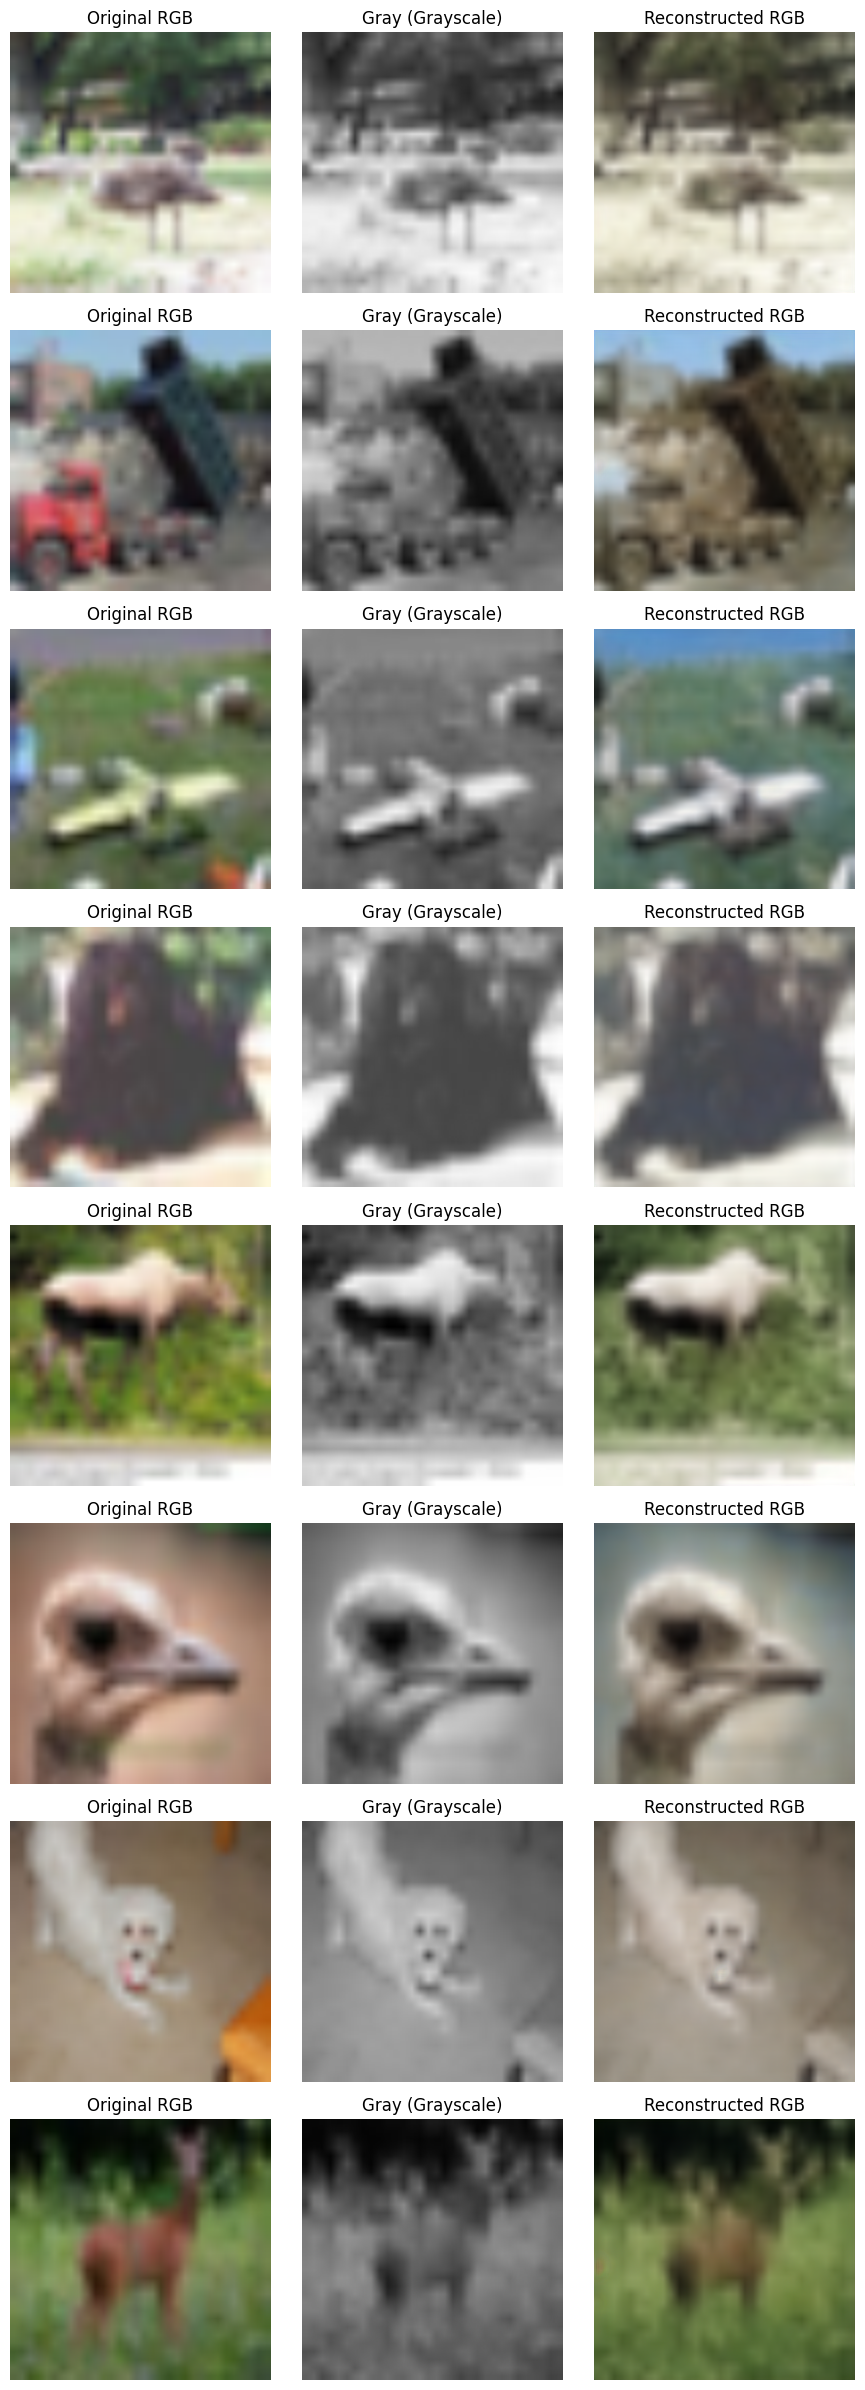

In [8]:
# Select a batch from the test set
with torch.no_grad():
    rgb_imgs, _ = next(iter(test_loader))
    gray_imgs = transform_gray(rgb_imgs)  # Convert RGB to grayscale
    gray_imgs, rgb_imgs = gray_imgs.to(device), rgb_imgs.to(device)
    
    # Encode gray images
    posterior = vae.encode(gray_imgs).latent_dist
    latents = posterior.sample()
    
    # Decode to RGB
    recon_rgb = vae.decode(latents).sample.cpu()
    
    # Plot results
    plot_results(rgb_imgs.cpu(), gray_imgs.cpu(), recon_rgb, name='test')